** GRIP TASK **

***Task #1 : Prediction using Supervised ML***


Submitted by : Jannath Fatima Mohammed


## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**

** AIM** : We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

we can see we dnt have any null values.

In [ ]:
df.shape

(25, 2)

we have 25 rows and two columns

In [ ]:
#lets check the statistics of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


the data seems normally distributed lets check for the skewness

In [ ]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
 df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


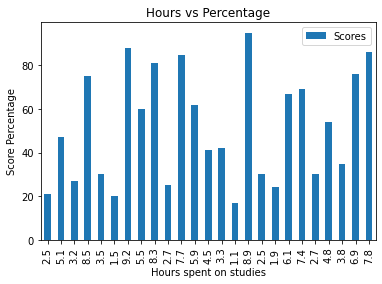

In [ ]:
df.plot.bar(x='Hours', y='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours spent on studies')  
plt.ylabel('Score Percentage')  
plt.show()

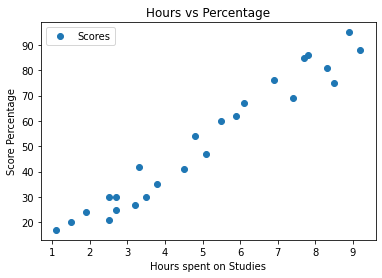

In [ ]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours spent on Studies')  
plt.ylabel('Score Percentage')  
plt.show()

the graph shows a linear relation between the attributes

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


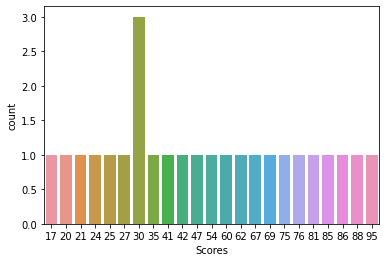

In [ ]:
sns.countplot(df.Scores)
plt.show()

plotting the data on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

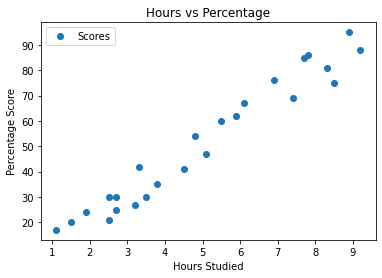

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [ ]:
x=df.drop(labels = 'Scores', axis=1)
y=df[['Scores']]

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20, 1) (5, 1)


Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train)
print("Training complete.")

Training complete.


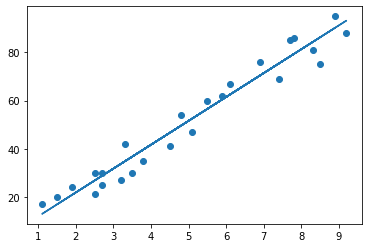

In [ ]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [ ]:
model.score(x_train,y_train)

0.9515510725211553

In [ ]:
model.score(x,y)

0.9526947647057273

In [ ]:
#Making Predictions
#Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(x_test)
y_testpredict = model.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [ ]:
model.predict([[9.25]])

array([[93.69173249]])

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_testpredict)) 

Mean Absolute Error: 4.183859899002982
